In [ ]:
Name: Aakkash.G
Index: 190001M

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy . optimize import minimize
from scipy import linalg
import random 

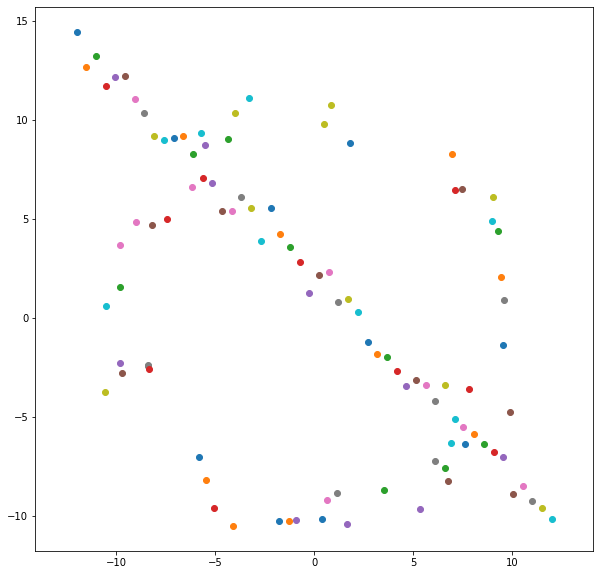

In [45]:
#Question 01

#np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform (0 , 2*np.pi , half_n )
n = s * np.random.randn( half_n )
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack(( x.reshape(half_n , 1 ) , y.reshape (half_n , 1 )))
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn( half_n )
X_line = np.hstack(( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
X = np.vstack ( ( X_line ,X_circ  ) )

plt.figure(figsize=(10,10))
for point in X:
    plt.scatter(point[0],point[1])
    plt.axis("equal")
plt.show()

In [47]:
def Circle_Drawer(Points ,Itarations ,Tresh_hold):
    max_inlinear = 0
    for sample in range(0 , Itarations +1):
        Point_1 = random.randint(0,len(Points)-1)
        Point_2 = random.randint(0,len(Points)-1) 
        Point_3 = random.randint(0,len(Points)-1)
        x1,x2,x3 = Points[Point_1][0] , Points[Point_2][0] , Points[Point_3][0]
        y1,y2,y3 = Points[Point_1][1] , Points[Point_2][1] , Points[Point_3][1]

        P = np.array([[2*x1 , 2*y1 , 1] , [2*x2 , 2*y2 , 1] , [2*x3 , 2*y3 , 1]])
        if (np.linalg.det(P)==0): 
            continue
        K = np.array([[x1**2 +y1**2] , [x2**2 +y2**2] , [x3**2 +y3**2]])*(-1)
        answ = np.linalg.inv(P) @ K
        g , f , c = answ[0][0] , answ[1][0] , answ[2][0]
        radius = np.sqrt(g**2 + f**2 -c)
        if (radius>10): 
            continue
        center = [-g , -f]

        inlinears = 0
        for  i in range(0 , len(Points)):
            distance = abs(np.sqrt((Points[i][0]-center[0])**2 + (Points[i][1]-center[1])**2) - radius)
            if distance < Tresh_hold:
                inlinears += 1
        if inlinears > max_inlinear:
            max_inlinear = inlinears
            coefficients =  [f, g, c]
            best_Sample_points = np.array([Points[Point_1],Points[Point_2],Points[Point_3]])
    
    return(coefficients,best_Sample_points,max_inlinear)

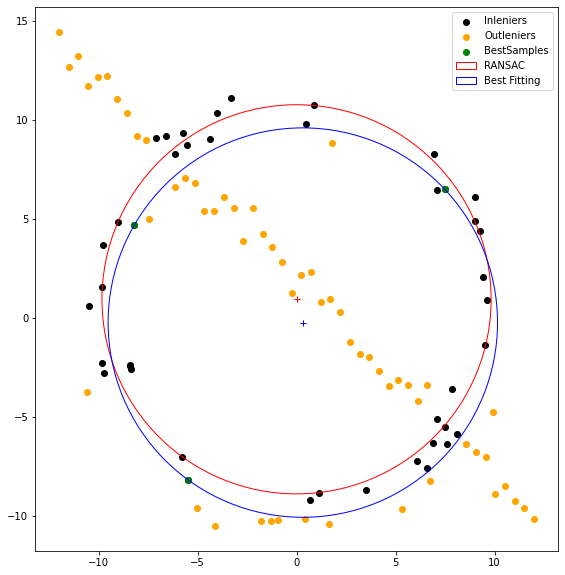

In [49]:
s , t , e , p= 3 , 1 , 0.5 ,0.99
N = int (np.log(1-p) / np.log(1 - (1-e)**s)) 

ran_coeff , ransac_sample , ransac_inlinear_count = Circle_Drawer(X,N,t)
F, G ,C = ran_coeff[0] , ran_coeff[1] , ran_coeff[2]
R = np.sqrt(G**2 + F**2 -C)

In,Out = [] ,[]
for point in X:
    d = abs(np.sqrt((point[0]+G)**2 + (point[1]+F)**2) - R)
    if d < t:
        In.append(point)
    else:
        Out.append(point)

Inlin = np.array(In).T
Outlin = np.array(Out).T
Samp = ransac_sample.T

best_fitting_coeff , best_selected_points , best_inlinear =Circle_Drawer(X,10000,t)
best_F, best_G ,best_C = best_fitting_coeff[0] , best_fitting_coeff[1] , best_fitting_coeff[2]
best_R = np.sqrt(best_G**2 + best_F**2 -best_C)

b_samp =  best_selected_points.T

figure, axes = plt.subplots( 1, figsize=(10,10) )

ransac_circle = plt.Circle((-G,-F), R, fill=False, color="red" ,label="RANSAC")
best_fitting_circle = plt.Circle((-best_G,-best_F), best_R, fill=False, color="blue" ,label="Best Fitting")

axes.scatter(Inlin[0],Inlin[1], color="black" , label="Inleniers")
axes.scatter(Outlin[0],Outlin[1], color="orange" , label="Outleniers")
axes.scatter(b_samp[0] ,b_samp[1], color="green" , label="BestSamples")
axes.plot(-G,-F,"+",color="red")
axes.plot(-best_G,-best_F,"+",color="blue")
axes.set_aspect( 1 )
axes.add_artist( ransac_circle )
axes.add_artist( best_fitting_circle )
plt.legend(loc ="upper right")
plt.show()


Text(0.5, 1.0, 'Blended Image')

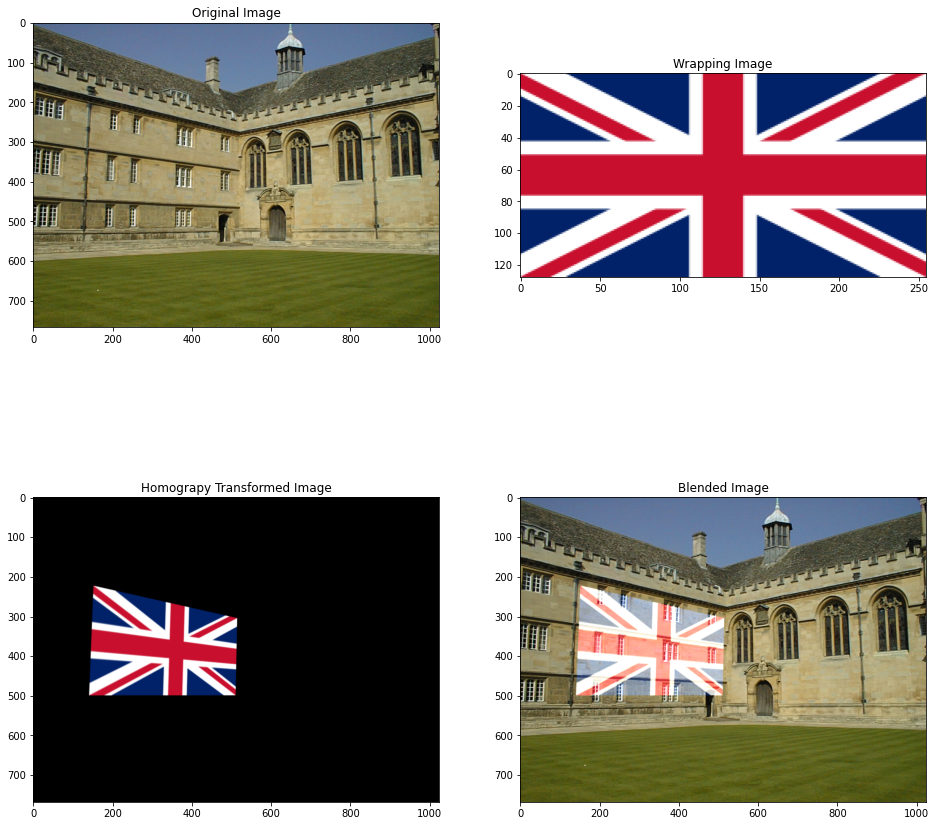

In [4]:
#Question 02

def Point_Selecting(event,x,y,f,pram):
    global im_temp,pts_src
    if event== cv.EVENT_LBUTTONDOWN:
        cv.circle(im_temp ,(x,y),3,(0,255,255),5,cv.LINE_AA)
        cv.imshow("Archi_Image",im_temp)
        if len(pts_src)<4:
            pts_src = np.append(pts_src,[(x,y)],axis=0)

archi_img = cv.imread("Archi.jpg")
uk_flag = cv.imread("Flag_of_the_United_Kingdom.svg.png")

height , width = archi_img.shape[0] , archi_img.shape[1]
f_width,f_height = uk_flag.shape[1] , uk_flag.shape[0]

pts_dst = np.array([[0,0] , [f_width-1,0] , [f_width-1,f_height-1] , [0,f_height-1] ])

cv.namedWindow("Archi_Image",1)

ppp = cv.cvtColor(archi_img, cv.COLOR_BGR2RGB)
im_temp = cv.cvtColor(ppp, cv.COLOR_RGB2BGR)
pts_src = np.empty((0,2))

cv.setMouseCallback("Archi_Image", Point_Selecting)

cv.imshow("Archi_Image",im_temp)
cv.waitKey(0)

Homograpy_Matrix , status = cv.findHomography(pts_src, pts_dst)
Wrapped_flag = cv.warpPerspective(uk_flag, np.linalg.inv(Homograpy_Matrix), (width, height))
Blend_image = cv.addWeighted(archi_img, 1, Wrapped_flag , 0.8, 0)

cv.imshow("Archi_Image",Blend_image)
cv.waitKey(0)

figure, axes = plt.subplots( 2,2, figsize=(16,16) )
axes[0,0].imshow(cv.cvtColor(archi_img,cv.COLOR_BGR2RGB))
axes[0,0].set_title("Original Image")
axes[0,1].imshow(cv.cvtColor(uk_flag,cv.COLOR_BGR2RGB))
axes[0,1].set_title("Wrapping Image")
axes[1,0].imshow(cv.cvtColor(Wrapped_flag,cv.COLOR_BGR2RGB))
axes[1,0].set_title("Homograpy Transformed Image")
axes[1,1].imshow(cv.cvtColor(Blend_image,cv.COLOR_BGR2RGB))
axes[1,1].set_title("Blended Image")

Text(0.5, 1.0, 'Blended Image')

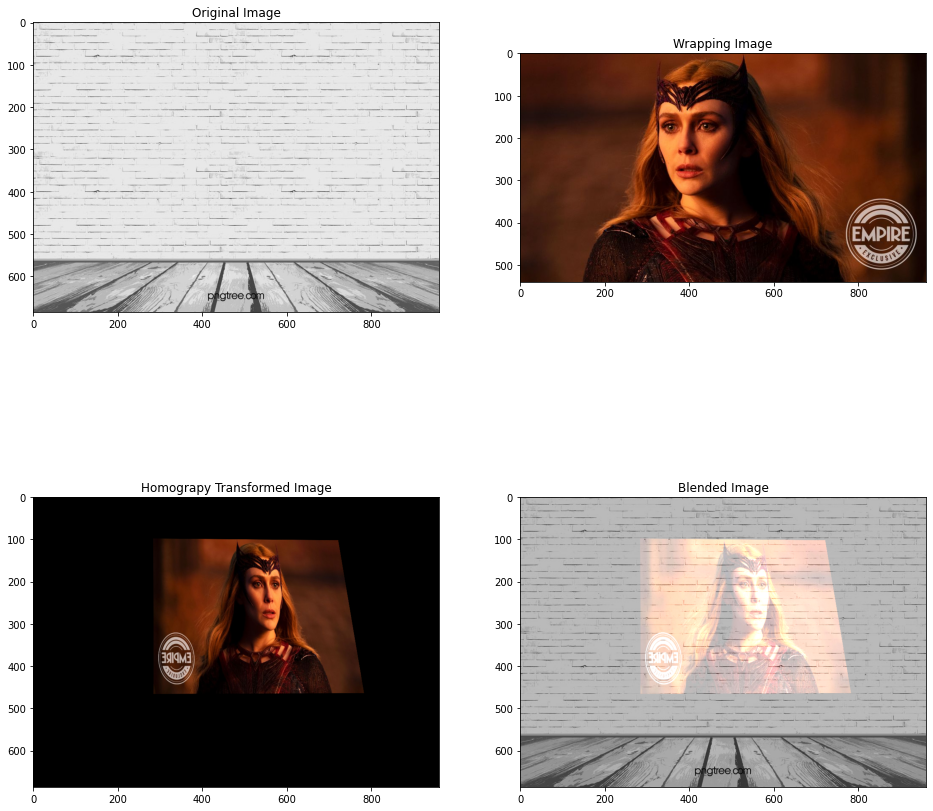

In [11]:
#Question 02

def Point_Selecting(event,x,y,f,pram):
    global im_temp,pts_src
    if event== cv.EVENT_LBUTTONDOWN:
        cv.circle(im_temp ,(x,y),3,(0,255,255),5,cv.LINE_AA)
        cv.imshow("Wall_Image",im_temp)
        if len(pts_src)<4:
            pts_src = np.append(pts_src,[(x,y)],axis=0)

archi_img = cv.imread("wall.jpg")
scarlet_witch = cv.imread("Scarletwitch.jpg")

height , width = archi_img.shape[0] , archi_img.shape[1]
f_width,f_height = scarlet_witch.shape[1] , scarlet_witch.shape[0]

pts_dst = np.array([[0,0] , [f_width-1,0] , [f_width-1,f_height-1] , [0,f_height-1] ])

cv.namedWindow("Wall_Image",1)

ppp = cv.cvtColor(archi_img, cv.COLOR_BGR2RGB)
im_temp = cv.cvtColor(ppp, cv.COLOR_RGB2BGR)
pts_src = np.empty((0,2))

cv.setMouseCallback("Wall_Image", Point_Selecting)

cv.imshow("Wall_Image",im_temp)
cv.waitKey(0)

Homograpy_Matrix , status = cv.findHomography(pts_src, pts_dst)
Warpped_witch = cv.warpPerspective(scarlet_witch, np.linalg.inv(Homograpy_Matrix), (width, height))
Blend_image = cv.addWeighted(archi_img, 0.8, Warpped_witch, 1, 0)

cv.imshow("Wall_Image",Blend_image)
cv.waitKey(0)

figure, axes = plt.subplots( 2,2, figsize=(16,16) )
axes[0,0].imshow(cv.cvtColor(archi_img,cv.COLOR_BGR2RGB))
axes[0,0].set_title("Original Image")
axes[0,1].imshow(cv.cvtColor(scarlet_witch,cv.COLOR_BGR2RGB))
axes[0,1].set_title("Wrapping Image")
axes[1,0].imshow(cv.cvtColor(Warpped_witch,cv.COLOR_BGR2RGB))
axes[1,0].set_title("Homograpy Transformed Image")
axes[1,1].imshow(cv.cvtColor(Blend_imag,cv.COLOR_BGR2RGB))
axes[1,1].set_title("Blended Image")

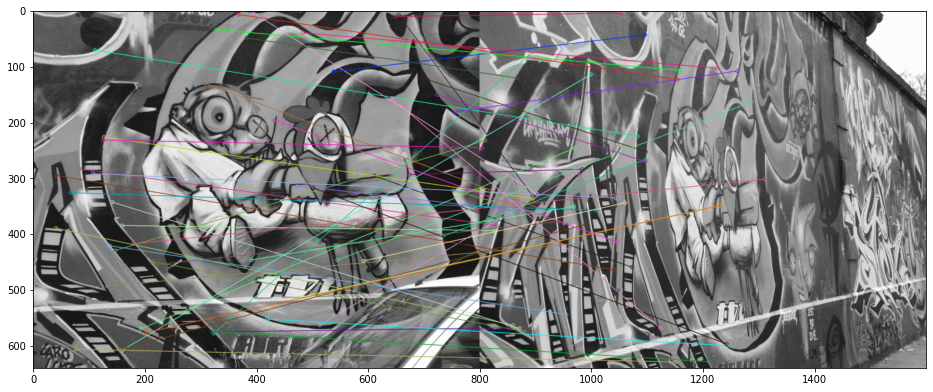

In [30]:
#Question 03
img1 = cv.imread(r'img1.ppm')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img5 = cv.imread(r'img5.ppm')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
key_1, descriptor_1 = sift.detectAndCompute(img1, None) 
key_2, descriptor_2 = sift.detectAndCompute(img5, None) 


bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptor_1,descriptor_2)
matches = sorted(matches, key = lambda x:x.distance)

Matched_img = cv.drawMatches(img1, key_1, img5, key_2, matches[:50], img5, flags=2)
plt.figure(figsize=(16,16))
plt.imshow(Matched_img)
plt.show()

In [57]:

def SIFT_key(src,dst):
    sift = cv.SIFT_create(nOctaveLayers=3, contrastThreshold=0.1, edgeThreshold=28, sigma=1)
    key_1, descriptor_1 = sift.detectAndCompute(src, None) 
    key_2, descriptor_2 = sift.detectAndCompute(dst, None) 

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = bf.match(descriptor_1,descriptor_2)
    matches = sorted(matches, key = lambda x:x.distance)

    list_kp1 = []
    list_kp2 = []

    for mat in matches:
        img1_id = mat.queryIdx
        img2_id = mat.trainIdx
    
        (x1, y1) = key_1[img1_id].pt
        (x2, y2) = key_2[img2_id].pt

        list_kp1.append((int(x1+0.5), int(y1+0.5)))
        list_kp2.append((int(x2+0.5), int(y2+0.5)))
    return(list_kp1,list_kp2)



In [58]:
def Homography(src,dst): 
    N = 20000   
    t = 0.6     
    max_inliers = 0
    H=[]        
    
    src_list , dst_list = SIFT_key(src,dst)
    src_keylist, dst_keylist = np.array(src_list) , np.array(dst_list)
   
    for samp in range(0,N):
        
        ind1  =random.randrange(0,len(src_keylist))
        ind2 = random.randrange(0,len(src_keylist))
        ind3 = random.randrange(0,len(src_keylist))
        ind4 = random.randrange(0,len(src_keylist))
        
        s_pt1 ,d_pt1 = src_keylist[ind1]  , dst_keylist[ind1]
        s_pt2 ,d_pt2 = src_keylist[ind2]  , dst_keylist[ind2]
        s_pt3 ,d_pt3 = src_keylist[ind3]  , dst_keylist[ind3]
        s_pt4 ,d_pt4 = src_keylist[ind4]  , dst_keylist[ind4]
        
        colinearity =  bool(np.cross(s_pt1,s_pt2)) and bool(np.cross(s_pt1,s_pt3)) and bool(np.cross(s_pt1,s_pt4))
        colinearity =  colinearity and bool(np.cross(s_pt2,s_pt3)) and bool(np.cross(s_pt2,s_pt4))
        colinearity =  colinearity and bool(np.cross(s_pt3,s_pt4))
        if (not colinearity): continue #skip colinear point selection
        
        A = np.array([[ -s_pt1[0], -s_pt1[1], -1, 0, 0, 0, d_pt1[0]*s_pt1[0], d_pt1[0]*s_pt1[1], d_pt1[0]],
                      [ 0, 0, 0, -s_pt1[0], -s_pt1[1], -1, d_pt1[1]*s_pt1[0], d_pt1[1]*s_pt1[1], d_pt1[1]],

                      [ -s_pt2[0], -s_pt2[1], -1, 0, 0, 0, d_pt2[0]*s_pt2[0], d_pt2[0]*s_pt2[1], d_pt2[0]],
                      [ 0, 0, 0, -s_pt2[0], -s_pt2[1], -1, d_pt2[1]*s_pt2[0], d_pt2[1]*s_pt2[1], d_pt2[1]],

                      [ -s_pt3[0], -s_pt3[1], -1, 0, 0, 0, d_pt3[0]*s_pt3[0], d_pt3[0]*s_pt3[1], d_pt3[0]],
                      [ 0, 0, 0, -s_pt3[0], -s_pt3[1], -1, d_pt3[1]*s_pt3[0], d_pt3[1]*s_pt3[1], d_pt3[1]],

                      [ -s_pt4[0], -s_pt4[1], -1, 0, 0, 0, d_pt4[0]*s_pt4[0], d_pt4[0]*s_pt4[1], d_pt4[0]],
                      [ 0, 0, 0, -s_pt4[0], -s_pt4[1], -1, d_pt4[1]*s_pt4[0], d_pt4[1]*s_pt4[1], d_pt4[1]],
                      [0, 0, 0, 0, 0, 0, 0, 0, 1]])
 
        h = np.linalg.inv(A) @ np.array([[0,0,0,0,0,0,0,0,1]]).T
        h = np.reshape(h,(3,3))#turn into a 3x3 matrix
        X = np.vstack([src_keylist.T , np.ones( (1, len(src_keylist)) )])#add 1 as an element, vertically

        transformed_keys = h @ X
        z= np.array([transformed_keys[-1]]).T
        transformed_keys = (transformed_keys[:2].T) / z

        
        inliers_count = 0
        for  i in range(0 , len(transformed_keys)):
            d = np.sqrt( (transformed_keys[i][0] - dst_keylist[i][0])**2 + (transformed_keys[i][1] - dst_keylist[i][1])**2 )
            if abs(d) < t:
                inliers_count += 1
        if inliers_count > max_inliers:
            max_inliers = inliers_count
            H = h
    print(max_inliers)
    return(H)

In [59]:
D= np.array([[6.2544644e-01  , 5.7759174e-02 ,  2.2201217e+02],
               [2.2240536e-01 ,  1.1652147e+00 , -2.5605611e+01],
                [4.9212545e-04 , -3.6542424e-05 ,  1.0000000e+00]])

C:\Users\ALPHAXANDER\AppData\Local\Temp\ipykernel_47720\531570369.py:46: RuntimeWarning: divide by zero encountered in true_divide
  transformed_keys = (transformed_keys[:2].T) / z
C:\Users\ALPHAXANDER\AppData\Local\Temp\ipykernel_47720\531570369.py:46: RuntimeWarning: invalid value encountered in true_divide
  transformed_keys = (transformed_keys[:2].T) / z


10
[[ 6.39079199e-01  8.07506291e-02  2.03534657e+02]
 [ 2.40864311e-01  1.14165674e+00 -3.27337592e+01]
 [ 5.00779568e-04 -1.03469483e-04  1.00000000e+00]]


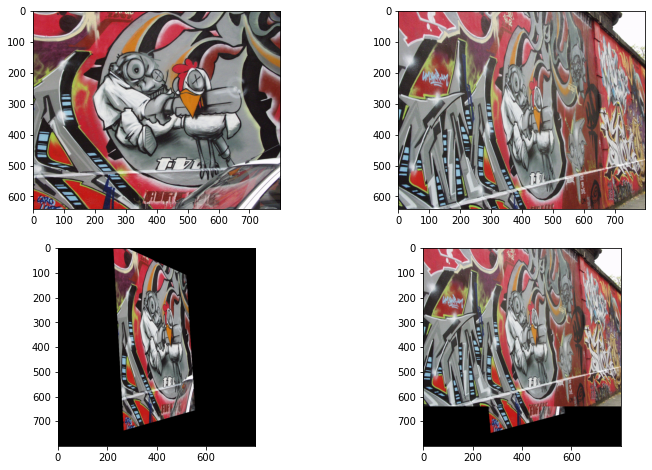

In [60]:
img1 = cv.imread(r'img1.ppm')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img5 = cv.imread(r'img5.ppm')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

H=Homography(img1,img5)
print(H)

warp= cv.warpPerspective(img1, D, (800,800))
result = cv.warpPerspective(img1, H, (800,800))

result[0:img5.shape[0],0:img5.shape[1]] = img5

figure,ax = plt.subplots(2,2,figsize=(12,8))
ax[0,0].imshow(img1)
ax[0,1].imshow(img5)
ax[1,0].imshow(warp)
ax[1,1].imshow(result)
plt.show()